<a href="https://colab.research.google.com/github/kurav/CMPE257-Fall23-Varshith-Kura/blob/class-activities/Class_Activity_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [375]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [376]:
import random

## Generates N random points for logistic regression on a line w
def generate_lr(N=20,w0=0,w1=1):
    n = 0
    X1 = []
    Y = []
    while(n < N):
        x1 = random.uniform(-10,10)
        x2 = random.uniform(-1,1)
        y = w0 + w1*x1 + x2
        X1.append(x1)
        Y.append(y)
        n += 1
    data = [np.array([1,X1[i],Y[i]]) for i in range(N)]
    return data

In [377]:
f_w0, f_w1 = 1, 1
N = 50
data = generate_lr(N, f_w0, f_w1)

In [378]:
def abline(slope, intercept, color='b'):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', label = "x_2="+str(slope)+"x_1+"+str(intercept), c=color )

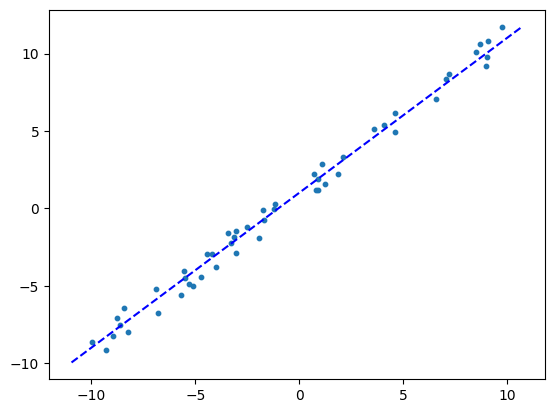

In [379]:
X1 = [i[1] for i in data]
Y  = [i[2] for i in data]
markers = [] #'o' or '+'
colors = [] # 'b' or 'r'
cnt = 0
plt.scatter(X1,Y, s = 10)

abline(f_w1,f_w0)
plt.show()

In [380]:
X = [[i[0], i[1]] for i in data]
Y  = [i[2] for i in data]

In [381]:
XtX = np.matmul(np.transpose(X), X)
XtX.shape

(2, 2)

In [382]:
XtX_inv = np.linalg.inv(XtX)
XtX_inv.shape
XtX_inv

array([[0.02050445, 0.00055741],
       [0.00055741, 0.00061594]])

In [383]:
X_pi = np.matmul(XtX_inv, np.transpose(X))
X_pi

array([[ 0.01866637,  0.02444489,  0.0182831 ,  0.01531324,  0.01494606,
         0.02100226,  0.01579631,  0.01785999,  0.01956238,  0.01672731,
         0.02418961,  0.02251688,  0.02557355,  0.01732262,  0.01740158,
         0.02453198,  0.01880102,  0.02091575,  0.01875438,  0.02550923,
         0.02168661,  0.02276936,  0.01882319,  0.02536337,  0.01942745,
         0.02594636,  0.01753791,  0.01665181,  0.0215415 ,  0.02100532,
         0.02094649,  0.02524519,  0.01983341,  0.01860308,  0.01744937,
         0.02120575,  0.01803341,  0.01984502,  0.02555421,  0.01815743,
         0.01909942,  0.02111332,  0.0155173 ,  0.01952715,  0.02306393,
         0.0156057 ,  0.023067  ,  0.01590614,  0.01765527,  0.01570002],
       [-0.00147365,  0.00491155, -0.00189715, -0.00517882, -0.00558455,
         0.00110748, -0.00464503, -0.00236468, -0.00048357, -0.00361628,
         0.00462947,  0.00278113,  0.00615871, -0.00295847, -0.00287123,
         0.00500778, -0.00132486,  0.0010119 , -0.

In [384]:
w = np.matmul(X_pi, Y)
w

array([1.03125195, 1.01954973])

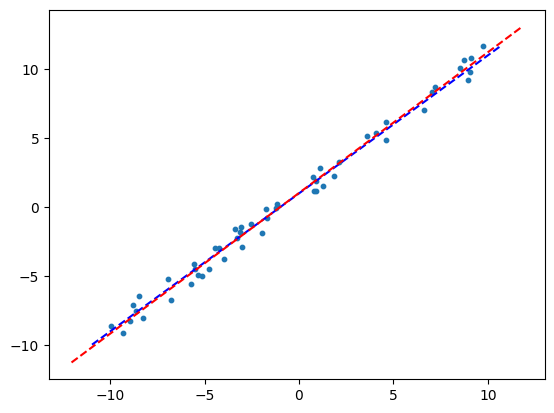

In [385]:
X1 = [i[1] for i in data]
Y  = [i[2] for i in data]
plt.scatter(X1,Y, s = 10)

abline(f_w1,f_w0)
abline(w[1],w[0], color='r')
plt.show()

In [386]:
Y_pred = np.matmul(X, w)
np.sum(np.square(Y_pred-Y))
MSE = np.sum(np.square(Y_pred - Y)) / N

In [387]:
w_other = [3, 2]
Y_other = np.matmul(X, w_other)
np.sum(np.square(Y_other-Y))

1637.6556078500907

In [388]:
#50 test samples
testdata = generate_lr(50, f_w0, f_w1)
X_test = [[i[0], i[1]] for i in testdata]
Y_test  = [i[2] for i in testdata]
Y_pred_test = np.matmul(X_test, w)
np.sum(np.square(Y_pred_test-Y_test))
MSE_test = np.sum(np.square(Y_pred_test - Y_test)) / 50

In [389]:
Y_pred_test_target = np.matmul(X_test, [1, 1])
MSE_target = np.sum(np.square(Y_pred_test_target - Y_test)) / 50
np.sum(np.square(Y_pred_test_target-Y_test))

16.47165453154611

In [390]:
Y_pred = np.matmul(X, w)
mse = np.sum(np.square(Y_pred - Y))
w_other = [1,1]
Y_other = np.matmul(X, w_other)
mse_other = np.sum(np.square(Y_other - Y))

In [391]:
testdata = generate_lr(50, f_w0, f_w1)
X_test = [[i[0], i[1]] for i in testdata]
Y_test = [i[2] for i in testdata]
Y_pred_test = np.matmul(X_test, w)
mse_test = np.sum(np.square(Y_pred_test - Y_test))

In [392]:
Y_pred_test_target = np.matmul(X_test, [1, 1])
mse_test_target = np.sum(np.square(Y_pred_test_target - Y_test))

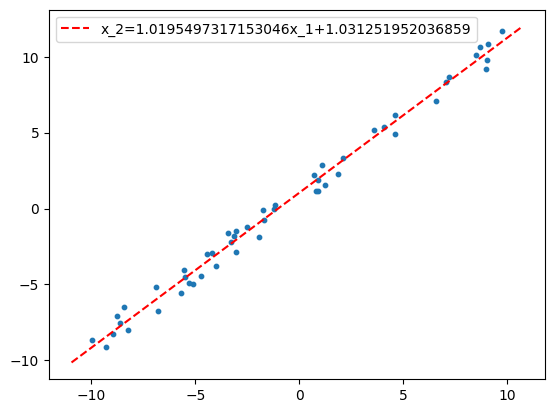

In [393]:
alpha = 0
I = np.identity(2)  # Identity matrix for regularization
XtX = np.matmul(np.transpose(X), X)
XtX_reg = XtX + alpha * I
XtX_reg_inv = np.linalg.inv(XtX_reg)
X_pi = np.matmul(XtX_reg_inv, np.transpose(X))
w = np.matmul(X_pi, Y)

X1 = [i[1] for i in data]
Y = [i[2] for i in data]
plt.scatter(X1, Y, s=10)
abline(w[1], w[0], color='r')
plt.legend()
plt.show()

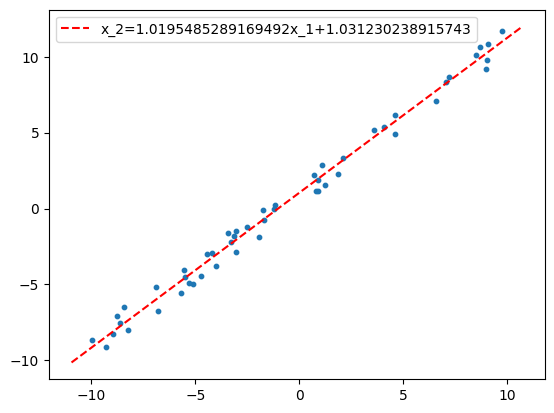

In [394]:
alpha = 0.001
I = np.identity(2)  # Identity matrix for regularization
XtX = np.matmul(np.transpose(X), X)
XtX_reg = XtX + alpha * I
XtX_reg_inv = np.linalg.inv(XtX_reg)
X_pi = np.matmul(XtX_reg_inv, np.transpose(X))
w = np.matmul(X_pi, Y)

X1 = [i[1] for i in data]
Y = [i[2] for i in data]
plt.scatter(X1, Y, s=10)
abline(w[1], w[0], color='r')
plt.legend()
plt.show()

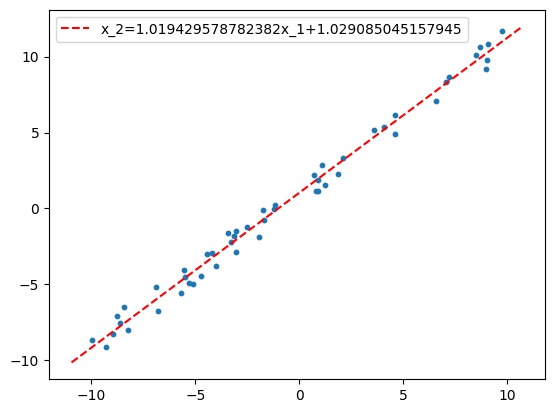

In [395]:
alpha = 0.1
I = np.identity(2)  # Identity matrix for regularization
XtX = np.matmul(np.transpose(X), X)
XtX_reg = XtX + alpha * I
XtX_reg_inv = np.linalg.inv(XtX_reg)
X_pi = np.matmul(XtX_reg_inv, np.transpose(X))
w = np.matmul(X_pi, Y)

X1 = [i[1] for i in data]
Y = [i[2] for i in data]
plt.scatter(X1, Y, s=10)
abline(w[1], w[0], color='r')
plt.legend()
plt.show()

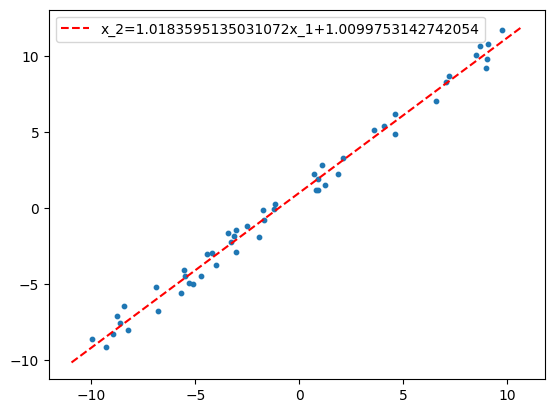

In [396]:
alpha = 1
I = np.identity(2)  # Identity matrix for regularization
XtX = np.matmul(np.transpose(X), X)
XtX_reg = XtX + alpha * I
XtX_reg_inv = np.linalg.inv(XtX_reg)
X_pi = np.matmul(XtX_reg_inv, np.transpose(X))
w = np.matmul(X_pi, Y)

X1 = [i[1] for i in data]
Y = [i[2] for i in data]
plt.scatter(X1, Y, s=10)
abline(w[1], w[0], color='r')
plt.legend()
plt.show()

In [402]:
alphas = [0,0.001,0.1,1]

best_alpha = None
best_mse = float('inf')

for alpha in alphas:
    mse_list = []
    kf = KFold(n_splits=5)  # 5-fold cross-validation using sklearn
    for p, q in kf.split(X):
        X_train, X_test = np.array(X)[p], np.array(X)[q]
        Y_train, Y_test = np.array(Y)[p], np.array(Y)[q]

        I = np.identity(2)
        XtX = np.matmul(np.transpose(X_train), X_train)
        XtX_reg = XtX + alpha * I
        XtX_reg_inv = np.linalg.inv(XtX_reg)
        X_pi = np.matmul(XtX_reg_inv, np.transpose(X_train))
        w = np.matmul(X_pi, Y_train)

        Y_pred = np.matmul(X_test, w)
        mse = mean_squared_error(Y_test, Y_pred)
        mse_list.append(mse)

    avg_mse = np.mean(mse_list)
    print(f"Alpha: {alpha}, Average MSE: {avg_mse}")

    if avg_mse < best_mse:
        best_mse = avg_mse
        best_alpha = alpha

print(f"\nBest Alpha: {best_alpha}, Best Average MSE: {best_mse}")

Alpha: 0, Average MSE: 0.3840723837992243
Alpha: 0.001, Average MSE: 0.38407218829106815
Alpha: 0.1, Average MSE: 0.38406108112723847
Alpha: 1, Average MSE: 0.3846722916530327

Best Alpha: 0.1, Best Average MSE: 0.38406108112723847
